In [4]:
# Step 1: Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style='whitegrid')
plt.style.use('ggplot')
# Load dataset
df = sns.load_dataset('titanic')
# Step 2: Initial Data Overview
print(df.head())
print("\nDataset Info:")
print(df.info())
print("\nSummary Stats:")
print(df.describe(include='all'))
# Step 3: Missing Values Analysis
print("\nMissing Values:\n", df.isnull().sum())
# Step 4: Data Cleaning
# Drop 'deck' due to too many missing values
df.drop(['deck'], axis=1, inplace=True)
# Fill missing values
df['age'] = df['age'].fillna(df['age'].median())
df['embark_town'] = df['embark_town'].fillna(df['embark_town'].mode()[0])
df['embarked'] = df['embarked'].fillna(df['embarked'].mode()[0])
# Drop rows with missing embark_town (if any still remain)
df.dropna(subset=['embark_town'], inplace=True)

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived

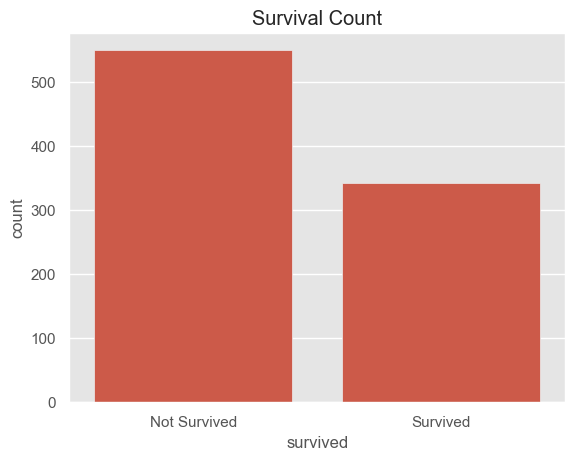

In [5]:
# 1. Survived Distribution
sns.countplot(x='survived', data=df)
plt.title('Survival Count')
plt.xticks([0, 1], ['Not Survived', 'Survived'])
plt.show()

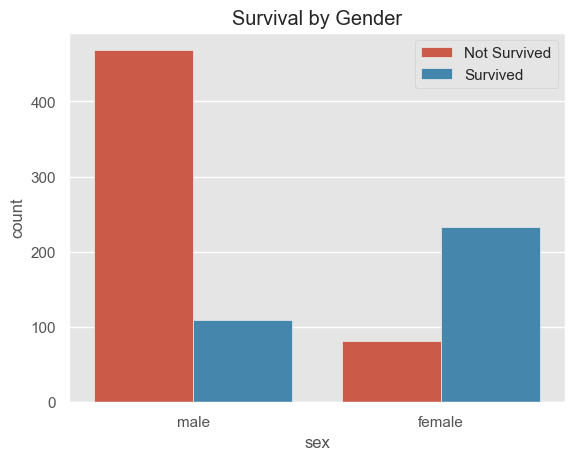

In [6]:
# 2. Gender vs Survival
sns.countplot(x='sex', hue='survived', data=df)
plt.title('Survival by Gender')
plt.legend(['Not Survived', 'Survived'])
plt.show()

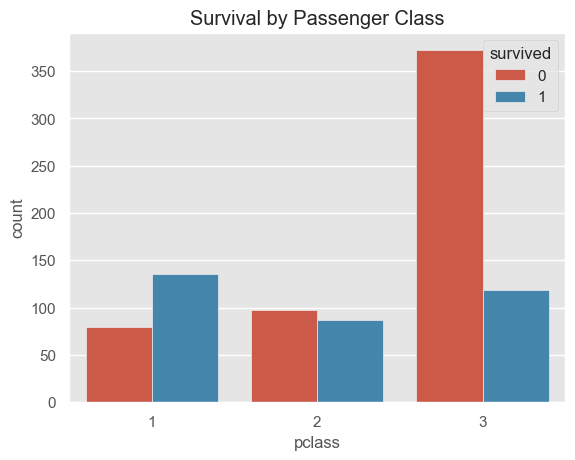

In [7]:
# 3. Class vs Survival
sns.countplot(x='pclass', hue='survived', data=df)
plt.title('Survival by Passenger Class')
plt.show()

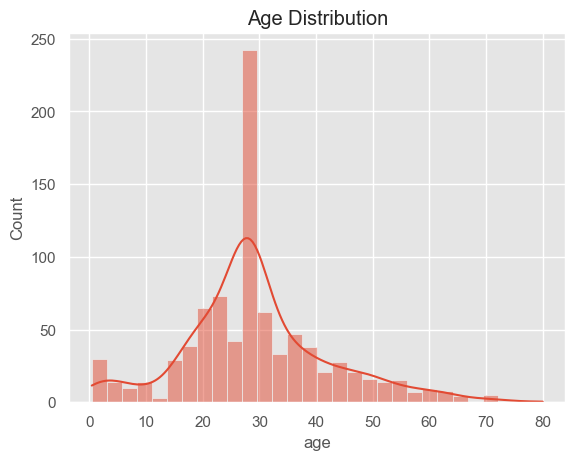

In [8]:
# 4. Age Distribution
sns.histplot(df['age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.show()

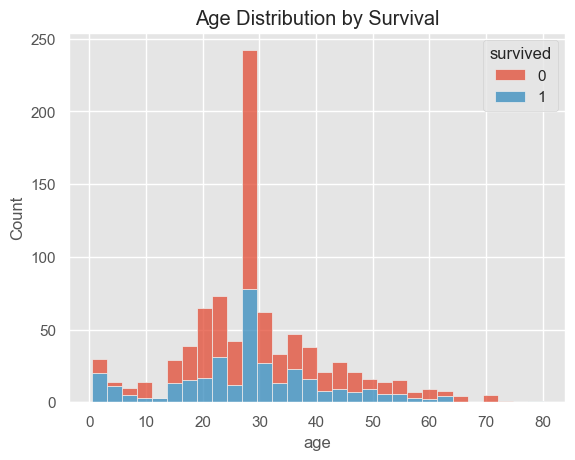

In [9]:
# 5. Age vs Survival
sns.histplot(data=df, x='age', hue='survived', multiple='stack', bins=30)
plt.title('Age Distribution by Survival')
plt.show()

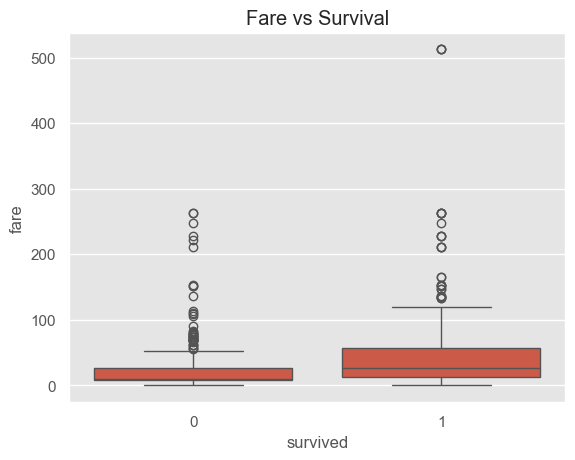

In [10]:
# 6. Fare vs Survival
sns.boxplot(x='survived', y='fare', data=df)
plt.title('Fare vs Survival')
plt.show()

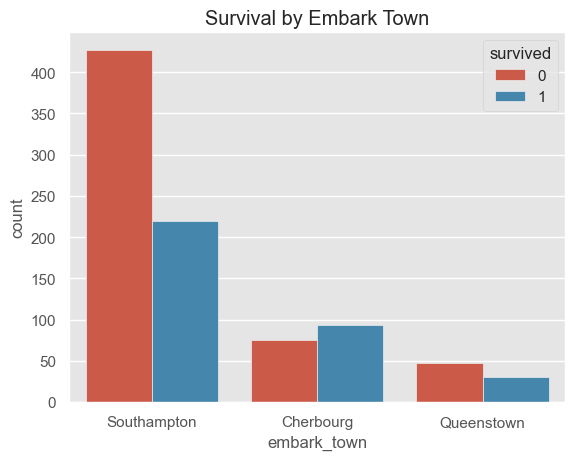

In [11]:
# 7. Embark Town vs Survival
sns.countplot(x='embark_town', hue='survived', data=df)
plt.title('Survival by Embark Town')
plt.show()

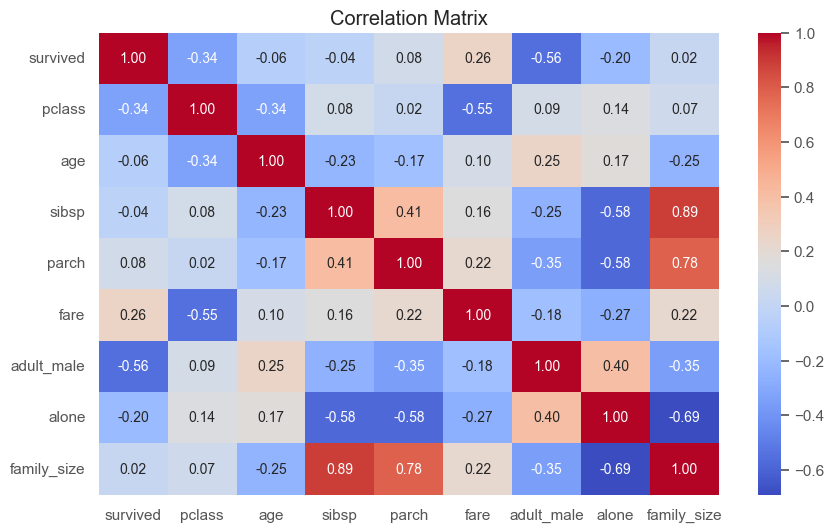

In [15]:
# Step 5: Correlation Matrix (only numeric)
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

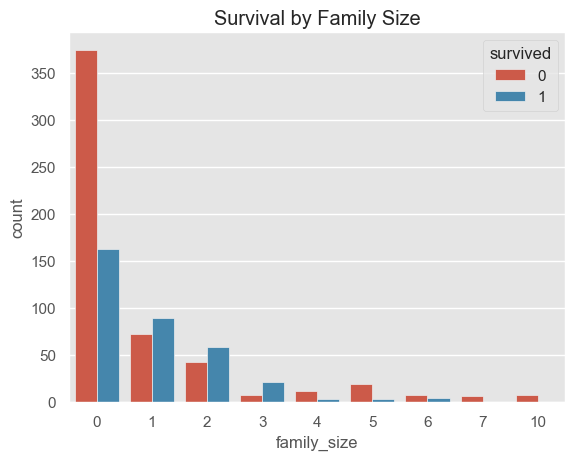

In [16]:
# Step 6: Feature Engineering - Family Size
df['family_size'] = df['sibsp'] + df['parch']
sns.countplot(x='family_size', hue='survived', data=df)
plt.title('Survival by Family Size')
plt.show()

In [17]:
# Step 7: Insights Summary
print("\n📌 Key Insights:")
print("- Female passengers had a much higher chance of survival.")
print("- 1st class passengers survived more often than 2nd or 3rd.")
print("- Younger passengers, especially children, survived more.")
print("- People who paid higher fares tended to survive more.")
print("- Embarking from Cherbourg shows a slightly better survival rate.")


📌 Key Insights:
- Female passengers had a much higher chance of survival.
- 1st class passengers survived more often than 2nd or 3rd.
- Younger passengers, especially children, survived more.
- People who paid higher fares tended to survive more.
- Embarking from Cherbourg shows a slightly better survival rate.
